In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Create a Function 
def wrangle(filepath):
    #load dataset
    df = pd.read_excel(filepath)
    
    # Rename "Time-Serie" column to date
    df = df.rename(columns = {"Time Serie": "date"})
    
    # Make date as Index
    df = df.set_index("date")
    
    # Change date type to datetime and sort values
    df.index = pd.to_datetime(df.index)#.sort_values()
    
    # Selecting data for time_series analysis
    df = df["CHINA - YUAN/US$"]
    
    # Convert "ND" to np.NaN and do a forward fill 
    df = df.replace("ND", np.nan)
    df = df.fillna(method = "ffill")
    
    
    return df

In [3]:
df = wrangle("Foreign_Exchange_Rates.xlsx")
df

date
2000-01-03    8.2798
2000-01-04    8.2799
2000-01-05    8.2798
2000-01-06    8.2797
2000-01-07    8.2794
               ...  
2019-12-25    7.0064
2019-12-26    6.9949
2019-12-27    6.9954
2019-12-30    6.9864
2019-12-31    6.9618
Name: CHINA - YUAN/US$, Length: 5217, dtype: float64

In [4]:
df.isnull().sum()

0

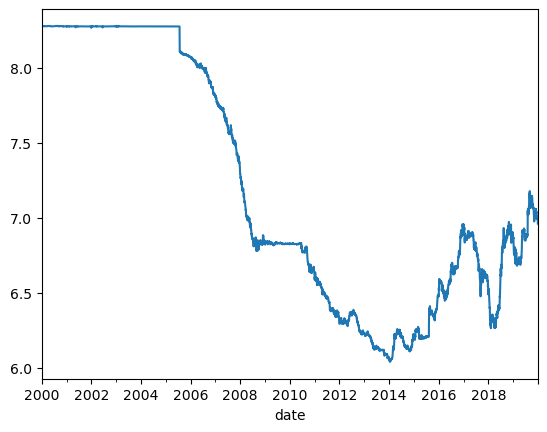

In [5]:
#Trend of China-Yuan/US$ over time 
df.plot.line(x =df.index,  y = "CHINA - YUAN/US$");

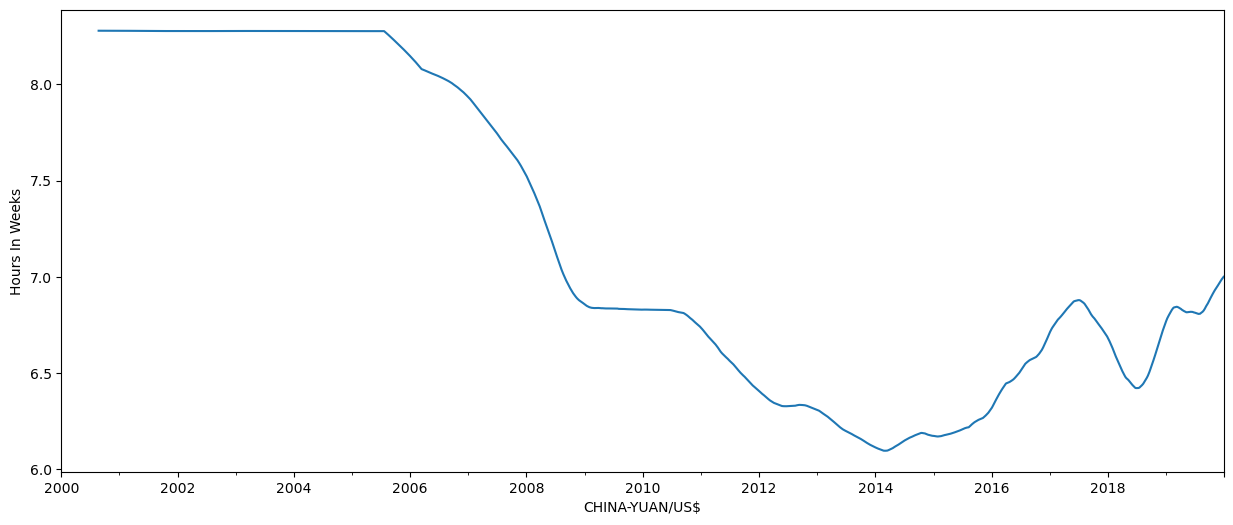

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
df.rolling(168).mean().plot(ax=ax, xlabel= "CHINA-YUAN/US$", ylabel="Hours In Weeks");

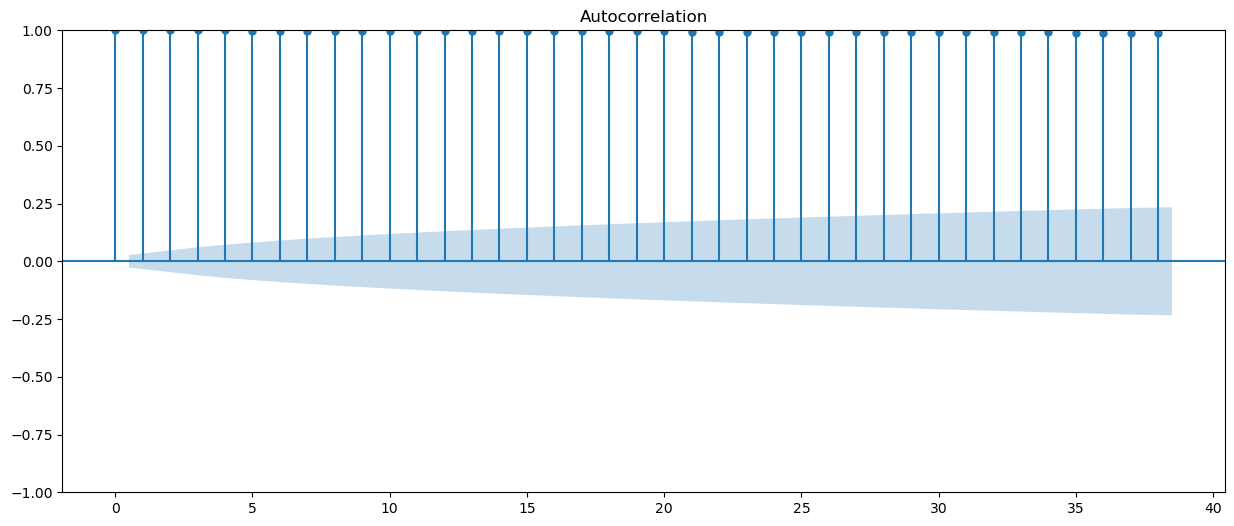

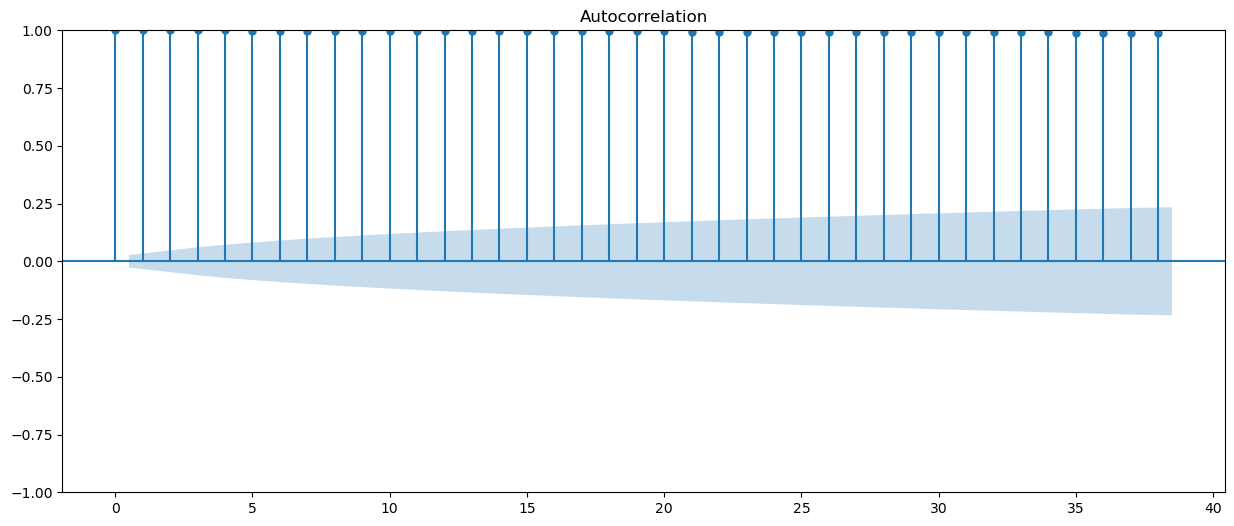

In [7]:
# Create an ACF plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df, ax=ax)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


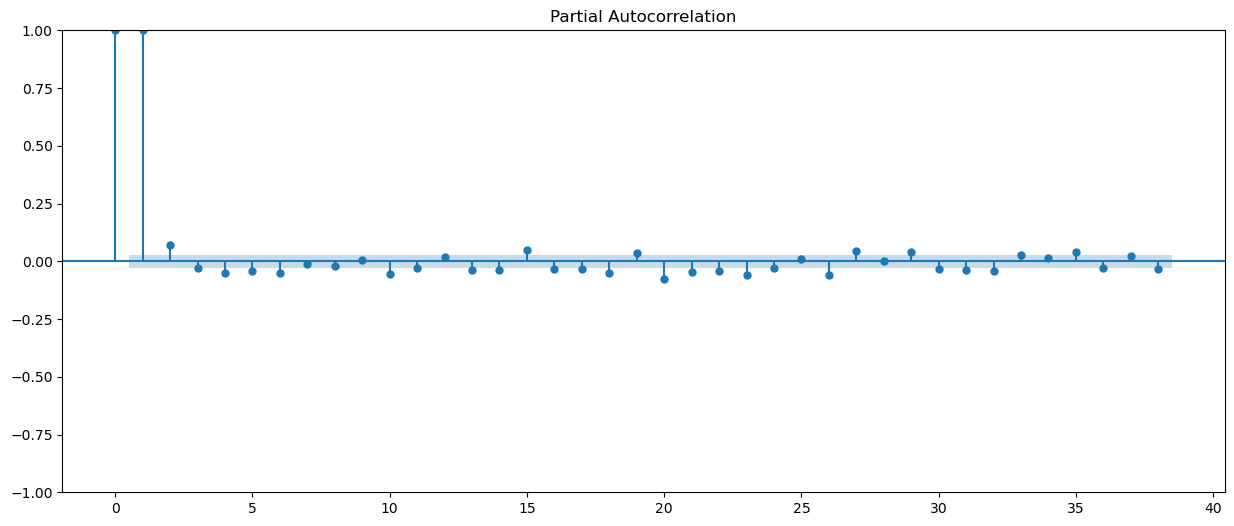

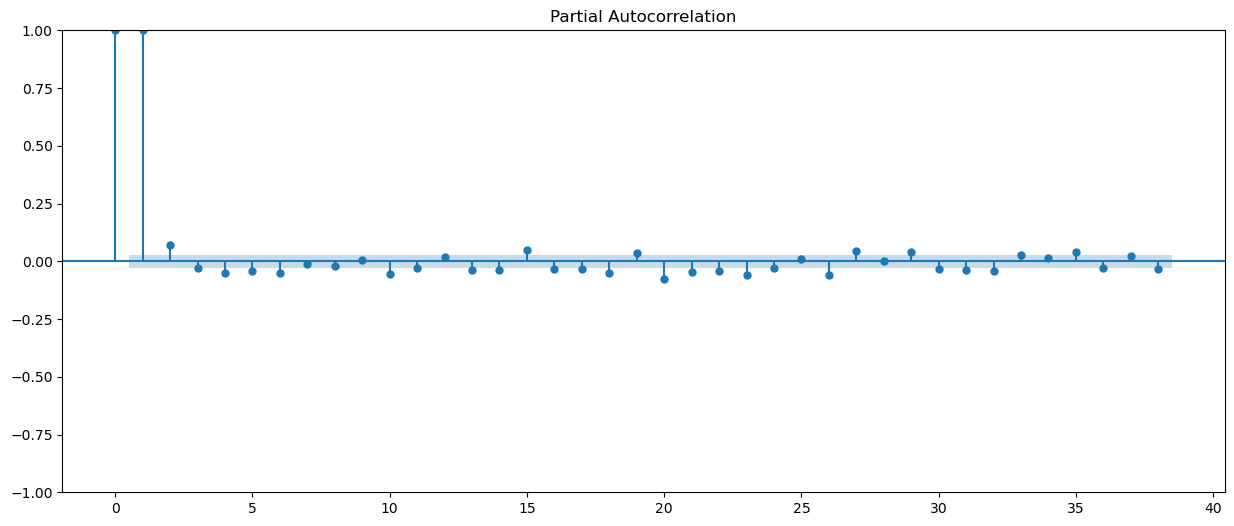

In [8]:
# Create an ACF plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df, ax=ax)

In [9]:
cutoff = int(len(df.values)*0.8)

y_train = df.iloc[:cutoff]
y_test = df.iloc[cutoff:]

In [10]:
len(y_train), len(y_test)

(4173, 1044)

In [11]:
len(df)

5217

In [12]:
y_mean = y_train.mean()
y_train_baseline = [y_mean]*len(y_train)
mae_baseline = mean_absolute_error(y_train, y_train_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_baseline))
print("This is MAE_baseline Score:", mae_baseline)
print("This is RSME_baseline Score:", rmse_baseline)

This is MAE_baseline Score: 0.8279382729997349
This is RSME_baseline Score: 0.8719061951583793


In [13]:
import time
p_params = range(1,20,5)
q_params = range(0,3,1)


In [14]:
# Create a Dictionary mae_grid
mae_grid = {}

for p in p_params:
    # Create a New Key in Dictionary With Empty List
    mae_grid[p] = []
    for q in q_params:
        # Set Hypereparameter For Model
        order = (p,0,q)
        # Start Time
        start_time = time.time()
        # Train Model
        model = ARIMA(y_train, order = order).fit()
        # Generate Elaspe Time
        elaspe_time = round(time.time() - start_time,2)
        print(f"Trained ARIMA{order} in {elaspe_time} seconds")
        # In Sample Prediction
        y_pred = model.predict()
        # Calculate MAE
        mae = mean_absolute_error(y_train, y_pred)
        # Append to mae_grid[p]
        mae_grid[p].append(mae)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  

Trained ARIMA(1, 0, 0) in 0.95 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(1, 0, 1) in 0.89 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(1, 0, 2) in 1.57 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(6, 0, 0) in 1.86 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(6, 0, 1) in 2.03 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(6, 0, 2) in 3.86 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(11, 0, 0) in 4.03 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(11, 0, 1) in 2.56 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA(11, 0, 2) in 7.67 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(16, 0, 0) in 7.19 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(16, 0, 1) in 7.05 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Trained ARIMA(16, 0, 2) in 15.3 seconds


In [15]:
pd.DataFrame(mae_grid)

,1,6,11,16
0,0.003303,0.003322,0.003323,0.003327
1,0.003303,0.003332,0.003348,0.003354
2,0.003306,0.003324,0.003337,0.003345


In [16]:
%%capture
y_pred_wfv = pd.Series()
history = y_train.copy()    
for  i in range (len(y_test)):
    model = ARIMA(history, order = (1, 0, 0)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

y_pred_wfv

In [17]:
arima_mae_test = mean_absolute_error(y_test, y_pred_wfv)
arima_rmse = np.sqrt(mean_squared_error(y_test, y_pred_wfv))
#arima_r2_score = r2_score(y_test, y_pred_wfv)
    
print(f"MAE for ARIMA model is: {arima_mae_test.round(4)}")
print(f"RSME is: {arima_rmse.round(4)}")


MAE for ARIMA model is: 0.0108
RSME is: 0.0162


In [18]:
next_pred

2019-12-31    6.986448
Freq: B, dtype: float64

In [19]:
y_test.min()

6.2649

In [20]:
len(y_pred_wfv)

1044

In [29]:
# Calculate MAE
test_mae = mean_absolute_error(y_test, y_pred_wfv)
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_wfv))

print(f"This is the Mean Absolute Score: {test_mae.round(4)}")
print(f"This is the Root Mean Squared Error Score: {test_rmse.round(4)}")

This is the Mean Absolute Score: 0.0108
This is the Root Mean Squared Error Score: 0.0162
